In [1]:
from IPython.display import display
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
matplotlib.rc('figure', figsize=[10,5])
import matplotlib.pyplot as plt
plt.style.use(['seaborn'])

hr_df = pd.read_csv("C:\\Users\\kelle\\Downloads\\HR_Data\\aug_train.csv")

def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "g-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.xlabel('Number of Training Instances Used')
    plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()
        
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "g-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)
    plt.gca().invert_xaxis()
    
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone    

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X.iloc[train_index]
            train_y_folds = train_y.iloc[train_index]
            test_X_fold = train_X.iloc[test_index]
            test_y_fold = train_y.iloc[test_index]
            classifier.fit(train_X_folds.values, train_y_folds.values.ravel())
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold.values, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds.values, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold.values, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds.values, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

hr_df['city']=hr_df['city'].astype(str)
hr_df['gender']=hr_df['gender'].astype(str)
hr_df['relevent_experience']=hr_df['relevent_experience'].astype(str)
hr_df['enrolled_university']=hr_df['enrolled_university'].astype(str)
hr_df['education_level']=hr_df['education_level'].astype(str)
hr_df['major_discipline']=hr_df['major_discipline'].astype(str)
hr_df['experience']=hr_df['experience'].astype(str)
hr_df['company_size']=hr_df['company_size'].astype(str)
hr_df['company_type']=hr_df['company_type'].astype(str)
hr_df['last_new_job']=hr_df['last_new_job'].astype(str)
hr_df = MultiColumnLabelEncoder(columns = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']).fit_transform(hr_df)

z

from sklearn.model_selection import StratifiedShuffleSplit
data_split = StratifiedShuffleSplit(n_splits=1 , test_size=0.3, random_state=30)
for train_ind, test_ind in data_split.split(hr_df, hr_df["target"]):
    strat_train_set = hr_df.loc[train_ind]
    strat_test_set = hr_df.loc[test_ind]
    
train_set = strat_train_set
test_set = strat_test_set

train_y = train_set[["target"]]
train_X = train_set.drop("target", axis=1)
test_y = test_set[["target"]]
test_X = test_set.drop("target", axis=1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
hr_knn = KNeighborsClassifier()
hr_knn.fit(train_X, train_y.values.ravel())

KNeighborsClassifier()

In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(hr_knn, train_X, train_y.values.ravel(),
                         scoring="f1_macro", cv=10)
scores.mean()

0.6376668297841179

326.477263212204


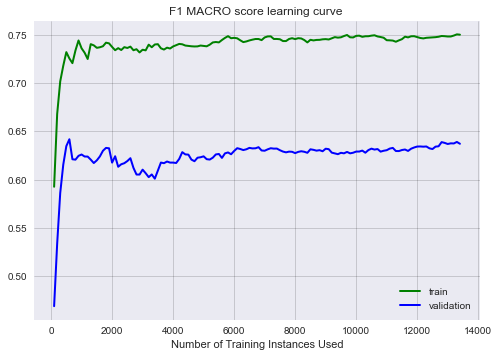

In [9]:
import time

start = time.time()

from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, hr_knn, f1_score, average="macro")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="F1 MACRO score learning curve ")

elapsed = (time.time() - start)

print(elapsed)

In [10]:
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
hr_knn.fit(train_X, train_y)
test_predictions = hr_knn.predict(test_X)
print(classification_report(test_y, test_predictions,digits=4,zero_division=True))
print(confusion_matrix(test_y, test_predictions))

<ipython-input-10-39b8dfad3050>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  hr_knn.fit(train_X, train_y)


              precision    recall  f1-score   support

         0.0     0.8096    0.8718    0.8395      4315
         1.0     0.4977    0.3824    0.4325      1433

    accuracy                         0.7498      5748
   macro avg     0.6536    0.6271    0.6360      5748
weighted avg     0.7318    0.7498    0.7381      5748

[[3762  553]
 [ 885  548]]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.3min finished


[       nan 0.75158421 0.71790875 0.69777513 0.68465168 0.67599252
 0.67192058 0.66830538 0.66302111 0.65843533 0.65486439 0.65308363
 0.66727645 0.66362411 0.66057026 0.65699821 0.65422179 0.65259467
 0.6496946  0.64701475 0.64547307 0.64395373 0.64127877 0.63972592
 0.62614616] [       nan 0.57020278 0.59296981 0.60408357 0.60670954 0.61373993
 0.61917196 0.61769491 0.61746159 0.61826533 0.62146737 0.62062693
 0.63465782 0.63214937 0.63553649 0.62891486 0.62969899 0.6301981
 0.62763898 0.62616569 0.62803436 0.62429662 0.62076364 0.61929706
 0.60855635] [ 0  2  4  6  8 10 12 14 16 18 20 22 25 27 29 31 33 35 37 39 41 43 45 47
 50]


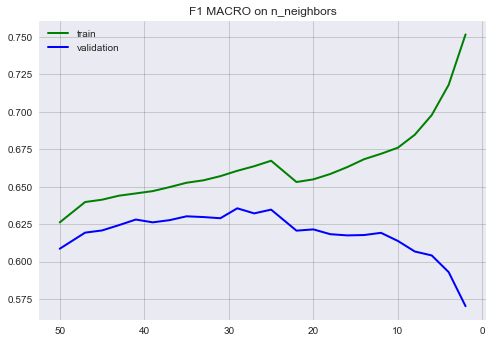

In [14]:
from sklearn.model_selection import validation_curve
hr_improved_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                             metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                             weights='uniform')

param_range = np.linspace(0, 50, 25).astype(int)
train_scores, test_scores = validation_curve(
    hr_improved_knn, train_X, train_y.values.ravel(), param_name="n_neighbors", param_range=param_range,
    scoring='f1_macro', verbose=1, cv=10, n_jobs=-1
)
print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)
plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='F1 MACRO on n_neighbors', inverse_x=True)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
hr_knn = KNeighborsClassifier(n_neighbors=29)
hr_knn.fit(train_X, train_y.values.ravel())

KNeighborsClassifier(n_neighbors=29)

454.82457995414734


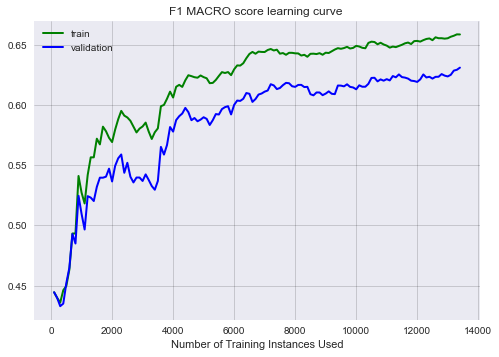

In [17]:
import time

start = time.time()

from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, hr_knn, f1_score, average="macro")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="F1 MACRO score learning curve ")

elapsed = (time.time() - start)

print(elapsed)

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(hr_knn, train_X, train_y.values.ravel(),
                         scoring="f1_macro", cv=10)
scores.mean()

0.6355364866414241

In [19]:
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
hr_knn.fit(train_X, train_y)
test_predictions = hr_knn.predict(test_X)
print(classification_report(test_y, test_predictions,digits=4,zero_division=True))
print(confusion_matrix(test_y, test_predictions))

<ipython-input-19-39b8dfad3050>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  hr_knn.fit(train_X, train_y)


              precision    recall  f1-score   support

         0.0     0.7998    0.9147    0.8534      4315
         1.0     0.5474    0.3105    0.3963      1433

    accuracy                         0.7641      5748
   macro avg     0.6736    0.6126    0.6248      5748
weighted avg     0.7369    0.7641    0.7394      5748

[[3947  368]
 [ 988  445]]
